In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import TimeDistributed
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from tensorflow.keras.optimizers import Adam

In [2]:
# tickerSymbol = '^SPX'
# tickerData = yf.Ticker(tickerSymbol)
# dfSP = tickerData.history(period='1d', start='2016-07-09', end='2023-06-26')
# dfSP = dfSP.rename(columns={'Open': 'OpenSP', 'High': 'HighSP','Low':'LowSP', 'Close': 'CloseSP'})
# dfSP.reset_index(inplace=True)
# dfSP.rename(columns = {'index':'Date'}, inplace = True)
# dfSP['Date'] = pd.to_datetime(dfSP['Date']).dt.date
# dfSP.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace = True)

In [3]:
# dfSP

In [4]:
df1 = pd.ExcelFile('final1.xlsx')
df1 = df1.parse('final')

print(df1)

          Dtate  Popularity  Halving
0    2016-07-09    2.651201    12.50
1    2016-07-10    2.067937    12.50
2    2016-07-11    1.855841    12.50
3    2016-07-12    1.855841    12.50
4    2016-07-13    1.696769    12.50
...         ...         ...      ...
2538 2023-06-21   10.844686     6.25
2539 2023-06-22   10.566617     6.25
2540 2023-06-23   10.010479     6.25
2541 2023-06-24    9.037238     6.25
2542 2023-06-25    8.620135     6.25

[2543 rows x 3 columns]


In [5]:
tickerSymbol = 'BTC-USD'
tickerData = yf.Ticker(tickerSymbol)
df = tickerData.history(period='1d', start='2016-07-09', end='2023-06-26')

In [6]:
df.ta.bbands(close='Close', length=20, std=2, append=True)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
2016-07-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2016-07-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2016-07-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2016-07-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2016-07-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-21 00:00:00+00:00,24515.324104,26623.556445,28731.788787,15.837346,1.307250
2023-06-22 00:00:00+00:00,24215.332529,26756.691016,29298.049502,18.996060,1.120847
2023-06-23 00:00:00+00:00,23870.144183,26937.708008,30005.271833,22.775240,1.112499


In [7]:
df['SMA'] = ta.sma(df['Close'], length = 20)
df['EMA'] = ta.ema(df['Close'], length = 20)
df['RSI'] = ta.rsi(df['Close'])
df['SMA_7'] = ta.sma(df['Close'], length=7)
macd = ta.macd(df['Close'])
df['MACD'] = macd['MACD_12_26_9']
df['MACD_signal'] = macd['MACDs_12_26_9']
df['MACD_histogram'] = macd['MACDh_12_26_9']
stoch = ta.stoch(df['High'], df['Low'], df['Close'])
df['%K'] = stoch['STOCHk_14_3_3']
df['%D'] = stoch['STOCHd_14_3_3']
df['OBV'] = ta.obv(df['Close'], df['Volume'])

In [8]:
dates = df.index.to_series()
df.reset_index(inplace=True)
df.rename(columns = {'index':'Date'}, inplace = True)

In [9]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,BBL_20_2.0,BBM_20_2.0,...,SMA,EMA,RSI,SMA_7,MACD,MACD_signal,MACD_histogram,%K,%D,OBV
0,2016-07-09 00:00:00+00:00,666.383972,666.383972,633.398987,650.960022,180536000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.805360e+08
1,2016-07-10 00:00:00+00:00,650.598999,652.294006,641.263977,649.359985,102532000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.800400e+07
2,2016-07-11 00:00:00+00:00,648.484009,659.629028,644.979980,647.658997,107910000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.990600e+07
3,2016-07-12 00:00:00+00:00,648.283020,675.258972,646.778992,664.551025,138172992,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082670e+08
4,2016-07-13 00:00:00+00:00,664.796997,668.700012,654.468018,654.468018,131449000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.318201e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,2023-06-21 00:00:00+00:00,28311.310547,30737.330078,28283.410156,30027.296875,33346760979,0.0,0.0,24515.324104,26623.556445,...,26623.556445,26930.143009,70.696114,27136.651507,218.601922,-178.827596,397.429518,89.118317,79.417901,1.195124e+12
2539,2023-06-22 00:00:00+00:00,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.0,0.0,24215.332529,26756.691016,...,26756.691016,27214.156175,69.628659,27756.063895,423.759480,-58.310180,482.069660,90.815295,86.646709,1.174471e+12
2540,2023-06-23 00:00:00+00:00,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.0,0.0,23870.144183,26937.708008,...,26937.708008,27545.709753,72.656304,28380.064732,642.142786,81.780413,560.362373,87.876396,89.270002,1.198587e+12
2541,2023-06-24 00:00:00+00:00,30708.738281,30804.148438,30290.146484,30548.695312,12147822496,0.0,0.0,23660.480714,27109.189453,...,27109.189453,27831.708378,71.223358,28956.924665,794.214529,224.267236,569.947293,87.609161,88.766950,1.186439e+12


In [10]:
df['Popularity']= df1['Popularity']
df['Halving']= df1['Halving']

In [11]:
#df = df.merge(dfSP, on='Date')

In [12]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,BBL_20_2.0,BBM_20_2.0,...,RSI,SMA_7,MACD,MACD_signal,MACD_histogram,%K,%D,OBV,Popularity,Halving
0,2016-07-09 00:00:00+00:00,666.383972,666.383972,633.398987,650.960022,180536000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.805360e+08,2.651201,12.50
1,2016-07-10 00:00:00+00:00,650.598999,652.294006,641.263977,649.359985,102532000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.800400e+07,2.067937,12.50
2,2016-07-11 00:00:00+00:00,648.484009,659.629028,644.979980,647.658997,107910000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.990600e+07,1.855841,12.50
3,2016-07-12 00:00:00+00:00,648.283020,675.258972,646.778992,664.551025,138172992,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082670e+08,1.855841,12.50
4,2016-07-13 00:00:00+00:00,664.796997,668.700012,654.468018,654.468018,131449000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.318201e+07,1.696769,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,2023-06-21 00:00:00+00:00,28311.310547,30737.330078,28283.410156,30027.296875,33346760979,0.0,0.0,24515.324104,26623.556445,...,70.696114,27136.651507,218.601922,-178.827596,397.429518,89.118317,79.417901,1.195124e+12,10.844686,6.25
2539,2023-06-22 00:00:00+00:00,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.0,0.0,24215.332529,26756.691016,...,69.628659,27756.063895,423.759480,-58.310180,482.069660,90.815295,86.646709,1.174471e+12,10.566617,6.25
2540,2023-06-23 00:00:00+00:00,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.0,0.0,23870.144183,26937.708008,...,72.656304,28380.064732,642.142786,81.780413,560.362373,87.876396,89.270002,1.198587e+12,10.010479,6.25
2541,2023-06-24 00:00:00+00:00,30708.738281,30804.148438,30290.146484,30548.695312,12147822496,0.0,0.0,23660.480714,27109.189453,...,71.223358,28956.924665,794.214529,224.267236,569.947293,87.609161,88.766950,1.186439e+12,9.037238,6.25


In [13]:
df['Target'] = df['Close']-df.Open
df['Target'] = df['Target'].shift(-1)

df['TargetNextClose'] = df['Close'].shift(-1)

df.dropna(inplace=True)
df.reset_index(inplace = True)


In [14]:
df

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,BBL_20_2.0,...,MACD,MACD_signal,MACD_histogram,%K,%D,OBV,Popularity,Halving,Target,TargetNextClose
0,33,2016-08-11 00:00:00+00:00,592.124023,597.541992,589.119995,589.119995,74514400,0.0,0.0,540.709874,...,-23.551125,-27.312857,3.761731,45.977729,46.219412,-3.566716e+08,1.378625,12.50,-1.238953,587.559021
1,34,2016-08-12 00:00:00+00:00,588.797974,589.909973,583.810974,587.559021,69218000,0.0,0.0,539.018478,...,-22.523724,-26.355030,3.831306,45.914155,46.125892,-4.258896e+08,1.431649,12.50,-1.768982,585.588013
2,35,2016-08-13 00:00:00+00:00,587.356995,589.773987,584.979004,585.588013,43563000,0.0,0.0,538.382228,...,-21.619330,-25.407890,3.788560,44.540511,45.477465,-4.694526e+08,1.484673,12.50,-15.115967,570.473022
3,36,2016-08-14 00:00:00+00:00,585.588989,585.666016,564.781006,570.473022,60851100,0.0,0.0,536.035369,...,-21.870140,-24.700340,2.830200,43.124457,44.526374,-5.303037e+08,1.378625,12.50,-3.254028,567.239990
4,37,2016-08-15 00:00:00+00:00,570.494019,573.580017,563.239990,567.239990,57262300,0.0,0.0,534.089780,...,-22.075317,-24.175335,2.100019,43.037278,43.567415,-5.875660e+08,1.431649,12.50,10.196045,577.439026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2537,2023-06-20 00:00:00+00:00,26841.664062,28388.968750,26668.791016,28327.488281,22211859147,0.0,0.0,25037.567422,...,-58.144070,-278.184975,220.040905,80.006516,70.267596,1.161777e+12,7.785928,6.25,1715.986328,30027.296875
2505,2538,2023-06-21 00:00:00+00:00,28311.310547,30737.330078,28283.410156,30027.296875,33346760979,0.0,0.0,24515.324104,...,218.601922,-178.827596,397.429518,89.118317,79.417901,1.195124e+12,10.844686,6.25,-83.654297,29912.281250
2506,2539,2023-06-22 00:00:00+00:00,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,0.0,0.0,24215.332529,...,423.759480,-58.310180,482.069660,90.815295,86.646709,1.174471e+12,10.566617,6.25,799.085938,30695.468750
2507,2540,2023-06-23 00:00:00+00:00,29896.382812,31389.539062,29845.214844,30695.468750,24115570085,0.0,0.0,23870.144183,...,642.142786,81.780413,560.362373,87.876396,89.270002,1.198587e+12,10.010479,6.25,-160.042969,30548.695312


In [15]:
df.drop(['Date', 'index', 'Dividends', 'Stock Splits', 'Halving', 'Volume'], axis=1, inplace = True)

In [16]:
df

,Open,High,Low,Close,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,SMA,...,SMA_7,MACD,MACD_signal,MACD_histogram,%K,%D,OBV,Popularity,Target,TargetNextClose
0,592.124023,597.541992,589.119995,589.119995,540.709874,614.139954,687.570033,23.913142,0.329634,614.139954,...,587.941302,-23.551125,-27.312857,3.761731,45.977729,46.219412,-3.566716e+08,1.378625,-1.238953,587.559021
1,588.797974,589.909973,583.810974,587.559021,539.018478,610.740103,682.461729,23.486791,0.338395,610.740103,...,589.729300,-22.523724,-26.355030,3.831306,45.914155,46.125892,-4.258896e+08,1.431649,-1.768982,585.588013
2,587.356995,589.773987,584.979004,585.588013,538.382228,606.955255,675.528282,22.595744,0.344201,606.955255,...,589.416443,-21.619330,-25.407890,3.788560,44.540511,45.477465,-4.694526e+08,1.484673,-15.115967,570.473022
3,585.588989,585.666016,564.781006,570.473022,536.035369,602.774057,669.512745,22.143849,0.258004,602.774057,...,586.242589,-21.870140,-24.700340,2.830200,43.124457,44.526374,-5.303037e+08,1.378625,-3.254028,567.239990
4,570.494019,573.580017,563.239990,567.239990,534.089780,598.546857,663.003933,21.537855,0.257150,598.546857,...,582.840585,-22.075317,-24.175335,2.100019,43.037278,43.567415,-5.875660e+08,1.431649,10.196045,577.439026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,26841.664062,28388.968750,26668.791016,28327.488281,25037.567422,26463.190234,27888.813046,10.774384,1.153854,26463.190234,...,26436.277065,-58.144070,-278.184975,220.040905,80.006516,70.267596,1.161777e+12,7.785928,1715.986328,30027.296875
2505,28311.310547,30737.330078,28283.410156,30027.296875,24515.324104,26623.556445,28731.788787,15.837346,1.307250,26623.556445,...,27136.651507,218.601922,-178.827596,397.429518,89.118317,79.417901,1.195124e+12,10.844686,-83.654297,29912.281250
2506,29995.935547,30495.998047,29679.158203,29912.281250,24215.332529,26756.691016,29298.049502,18.996060,1.120847,26756.691016,...,27756.063895,423.759480,-58.310180,482.069660,90.815295,86.646709,1.174471e+12,10.566617,799.085938,30695.468750
2507,29896.382812,31389.539062,29845.214844,30695.468750,23870.144183,26937.708008,30005.271833,22.775240,1.112499,26937.708008,...,28380.064732,642.142786,81.780413,560.362373,87.876396,89.270002,1.198587e+12,10.010479,-160.042969,30548.695312


In [17]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(df)
print(data_set_scaled)

[[3.71455913e-04 3.51265968e-04 3.93200667e-04 ... 5.37363555e-04
  5.08467382e-01 3.03270980e-04]
 [3.21800402e-04 2.39385852e-04 3.12539531e-04 ... 1.07472712e-03
  5.08431747e-01 2.73852765e-04]
 [3.00287631e-04 2.37392387e-04 3.30285667e-04 ... 1.61209067e-03
  5.07534388e-01 4.82545090e-05]
 ...
 [4.39349029e-01 4.38641936e-01 4.42364617e-01 ... 9.36516102e-02
  5.62275682e-01 4.49677820e-01]
 [4.37862779e-01 4.51740629e-01 4.44887552e-01 ... 8.80155208e-02
  4.97790501e-01 4.47487159e-01]
 [4.49990657e-01 4.43159207e-01 4.51647498e-01 ... 7.81523643e-02
  5.04188016e-01 4.46465755e-01]]


In [18]:
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(20):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X.shape)
print(y.shape)

2509
(2479, 30, 20)
(2479, 1)


In [19]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1983
(1983, 30, 20)
(496, 30, 20)
(1983, 1)
(496, 1)


In [20]:
# lstm_input = Input(shape=(backcandles, 20), name='lstm_input')
# inputs = LSTM(150, return_sequences=True, name='first_layer')(lstm_input)
# inputs = LSTM(100, name='second_lstm_layer')(inputs)
# inputs = Dense(50, activation='relu', name='first_dense_layer')(inputs)
# inputs = Dense(10, activation='relu', name='second_dense_layer')(inputs)
# inputs = Dense(1, activation='relu', name='third_dense_layer')(inputs)
# output = Activation('linear', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# adam = Adam(learning_rate=0.001)
# model.compile(optimizer=adam, loss='mse')
# history = model.fit(x=X_train, y=y_train, batch_size=15, epochs=10, shuffle=True, validation_split = 0.1)

In [21]:
lstm_input = Input(shape=(backcandles, 20), name='lstm_input')
inputs = LSTM(100, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='mse')
history = model.fit(x=X_train, y=y_train, batch_size=15, epochs=10, shuffle=True, validation_split = 0.1)

Epoch 1/10
119/119 [==============================] - 3s 16ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 2/10
119/119 [==============================] - 2s 13ms/step - loss: 5.6156e-04 - val_loss: 0.0020
Epoch 3/10
119/119 [==============================] - 1s 12ms/step - loss: 5.6532e-04 - val_loss: 0.0027
Epoch 4/10
119/119 [==============================] - 1s 12ms/step - loss: 3.8669e-04 - val_loss: 0.0028
Epoch 5/10
119/119 [==============================] - 1s 13ms/step - loss: 4.7803e-04 - val_loss: 0.0023
Epoch 6/10
119/119 [==============================] - 1s 12ms/step - loss: 5.4366e-04 - val_loss: 0.0021
Epoch 7/10
119/119 [==============================] - 1s 12ms/step - loss: 3.8117e-04 - val_loss: 0.0016
Epoch 8/10
119/119 [==============================] - 2s 13ms/step - loss: 4.5947e-04 - val_loss: 0.0017
Epoch 9/10
119/119 [==============================] - 2s 13ms/step - loss: 3.3433e-04 - val_loss: 0.0016
Epoch 10/10
119/119 [==============================] - 2s 1

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 20)]          0         
                                                                 
 first_layer (LSTM)          (None, 100)               48400     
                                                                 
 dense_layer (Dense)         (None, 1)                 101       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 48,501
Trainable params: 48,501
Non-trainable params: 0
_________________________________________________________________


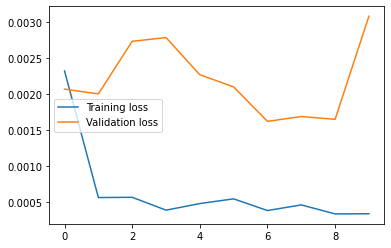

In [23]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()


In [24]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

[0.58627886] [0.65683931]
[0.5866238] [0.64768487]
[0.6042737] [0.59658235]
[0.60984707] [0.58901461]
[0.58246726] [0.59037551]
[0.55682373] [0.56513988]
[0.5450296] [0.54489949]
[0.5304302] [0.56297044]
[0.5179423] [0.54820233]
[0.5221651] [0.56366569]


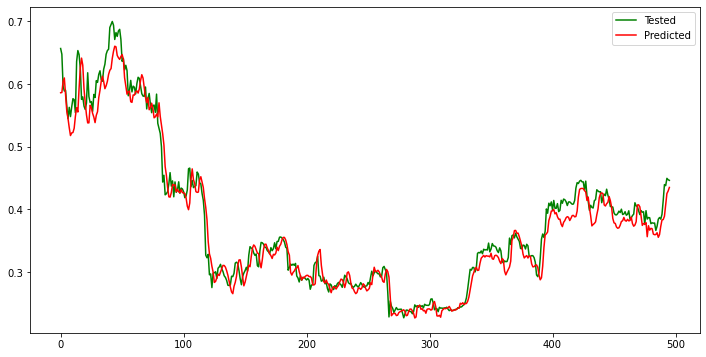

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color = 'green', label = 'Tested')
plt.plot(y_pred, color = 'red', label = 'Predicted')
plt.legend()
plt.show()

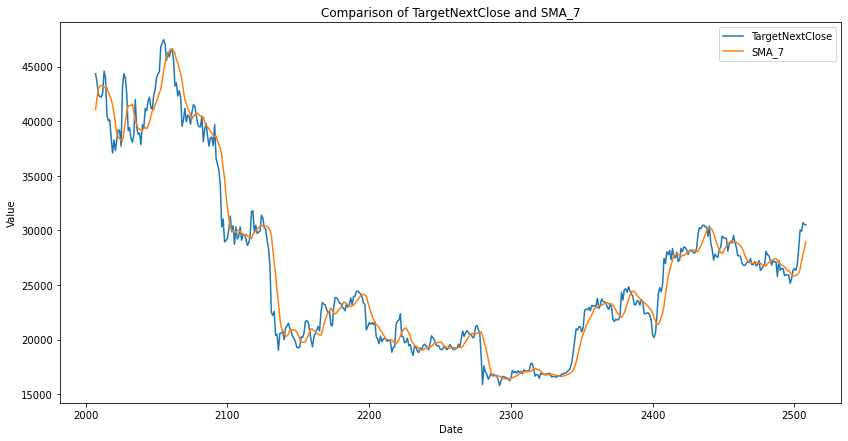

In [26]:
start_idx = int(len(df) * 0.8)

last_20_percent = df[start_idx:]

plt.figure(figsize=(14,7))

plt.plot(last_20_percent['TargetNextClose'], label='TargetNextClose')
plt.plot(last_20_percent['SMA_7'], label='SMA_7')

plt.title('Comparison of TargetNextClose and SMA_7')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

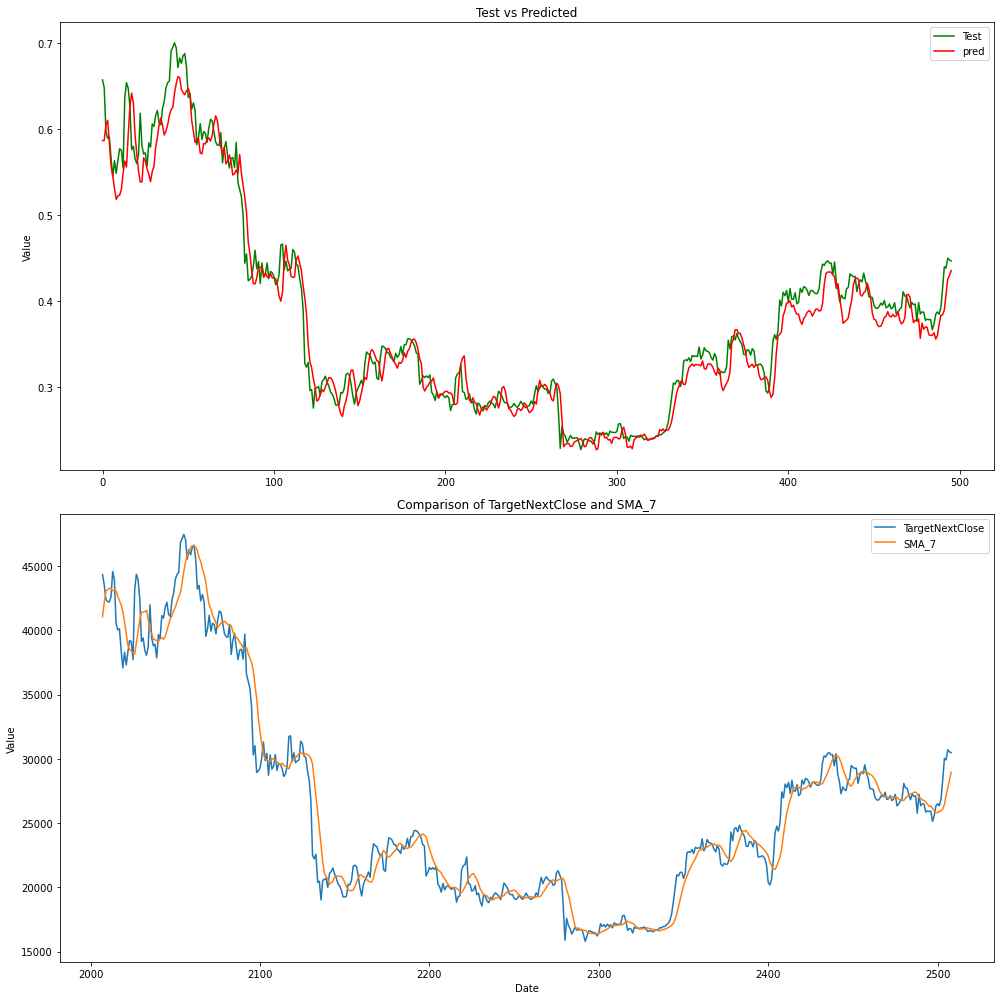

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,14))


ax1.plot(y_test, color = 'green', label = 'Test')
ax1.plot(y_pred, color = 'red', label = 'pred')
ax1.set_title('Test vs Predicted')
ax1.set_ylabel('Value')
ax1.legend()

start_idx = int(len(df) * 0.8)

last_20_percent = df[start_idx:]

ax2.plot(last_20_percent['TargetNextClose'], label='TargetNextClose')
ax2.plot(last_20_percent['SMA_7'], label='SMA_7')
ax2.set_title('Comparison of TargetNextClose and SMA_7')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()

plt.tight_layout()
plt.show()

In [47]:
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(20):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-2])
y=np.reshape(yi,(len(yi),1))
print(X.shape)
print(y.shape)

2509
(2479, 30, 20)
(2479, 1)


In [48]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1983
(1983, 30, 20)
(496, 30, 20)
(1983, 1)
(496, 1)
[[0.50742755]
 [0.50863391]
 [0.50863244]
 ...
 [0.49726682]
 [0.50592518]
 [0.5374286 ]]


In [49]:
lstm_input = Input(shape=(backcandles, 20), name='lstm_input')
inputs = LSTM(100, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='mse')
history = model.fit(x=X_train, y=y_train, batch_size=15, epochs=10, shuffle=True, validation_split = 0.1)

Epoch 1/10
119/119 [==============================] - 4s 18ms/step - loss: 0.0106 - val_loss: 0.0136
Epoch 2/10
119/119 [==============================] - 2s 14ms/step - loss: 0.0030 - val_loss: 0.0128
Epoch 3/10
119/119 [==============================] - 2s 14ms/step - loss: 0.0036 - val_loss: 0.0129
Epoch 4/10
119/119 [==============================] - 2s 13ms/step - loss: 0.0032 - val_loss: 0.0150
Epoch 5/10
119/119 [==============================] - 2s 15ms/step - loss: 0.0032 - val_loss: 0.0128
Epoch 6/10
119/119 [==============================] - 2s 14ms/step - loss: 0.0031 - val_loss: 0.0131
Epoch 7/10
119/119 [==============================] - 2s 13ms/step - loss: 0.0032 - val_loss: 0.0175
Epoch 8/10
119/119 [==============================] - 2s 13ms/step - loss: 0.0029 - val_loss: 0.0136
Epoch 9/10
119/119 [==============================] - 2s 13ms/step - loss: 0.0030 - val_loss: 0.0137
Epoch 10/10
119/119 [==============================] - 2s 13ms/step - loss: 0.0028 - val_lo

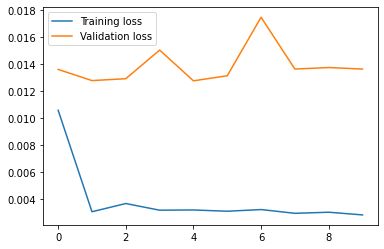

In [50]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()

In [51]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

[0.48859602] [0.64225966]
[0.48870966] [0.46710701]
[0.48905444] [0.28002154]
[0.4878306] [0.47351175]
[0.48213625] [0.51501399]
[0.4816882] [0.39514714]
[0.4854379] [0.41792523]
[0.48933035] [0.59039066]
[0.49383092] [0.44207661]
[0.50038606] [0.57941723]


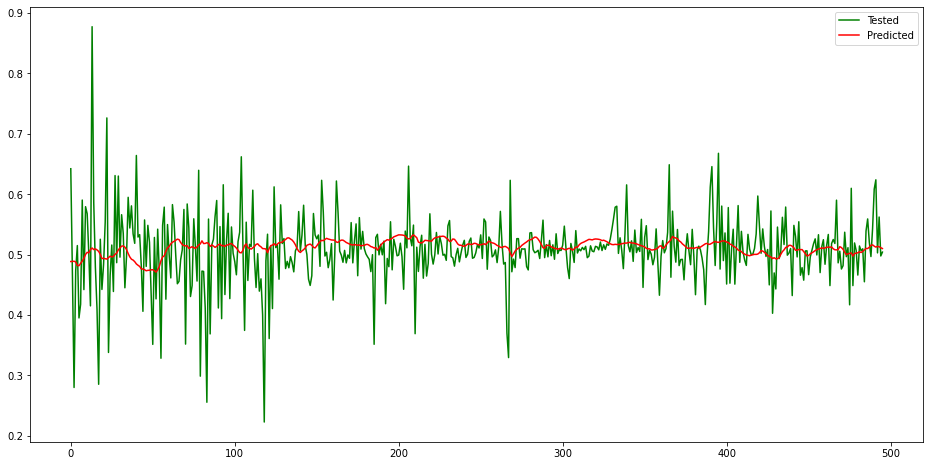

In [52]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'green', label = 'Tested')
plt.plot(y_pred, color = 'red', label = 'Predicted')
plt.legend()
plt.show()